In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Basic Bayesian Case: Updating estimates of the fairness of a coin

To begin, we define the following:

theta = the function representing the distribution of estimates of the coin's fairness, a Beta(alpha,beta) with bound 0,1

D     = the evidence, i.e. whether the current step turned up heads

alpha = the number of heads + 1

beta  = the number of tails + 1


p(theta)   = the prior distribution of theta, i.e. the estimated distribution based on currently known information

p(D)       = the term required to integrate to 1. Literally, the probability of the evidence, but it is generally ignored

p(theta|D) = the new distribution we are solving for. Literally, the distribution theta based upon new evidence D

p(D|theta) = the posterior, the likelihood distribution of the evidence given the theta prior distribution


The equation we solve for is as follows:
p(theta|D) = (p(D|theta) * p(theta))/p(D)

### Beginning: 0 Heads, 0 Tails

We begin with no evidence and no history. Thus, our prior is uniformed of the shape Beta(1,1) and p(D) and p(D|H) are meaningless.

In [25]:
size = 1000

In [18]:
alpha    = 1
beta     = 1
p_theta  = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta)')

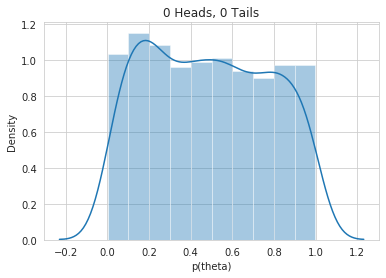

In [16]:
sns.distplot(p_theta)
plt.title('0 Heads, 0 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta)')

### 1 Heads, 0 Tails

Remember that the prior, p(theta) is still Beta(1,1). However, the update step below adds the new evidence (1 Heads) into the equation. It provides evidence, D, the update of which can be expressed as p(D|theta) * p(theta).

In [19]:
#update step
alpha = alpha + 1
#unnecessary, but for example purposes I'm making it explicit
beta = beta
#draw the new distribution
p_theta_D = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta_D)')

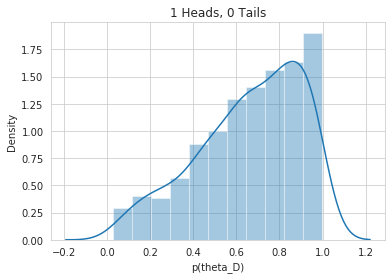

In [20]:
sns.distplot(p_theta_D)
plt.title('1 Heads, 0 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta_D)')

As expected, we tilted our distribution to favor 1 (getting heads).

### 2 Heads, 0 Tails

In [21]:
#update step
alpha = alpha + 1
#unnecessary, but for example purposes I'm making it explicit
beta = beta
#draw the new distribution
p_theta_D = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta_D)')

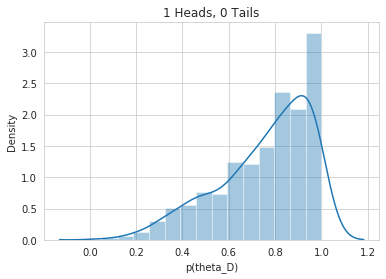

In [22]:
sns.distplot(p_theta_D)
plt.title('1 Heads, 0 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta_D)')

Note that the peak of the chart is now about 3.0, at 1, and there is almost no chance of a <0.2 p(theta|D). If we were to integrate, we would be able to say exactly how small. We can approximate in the following way:

In [26]:
len(p_theta_D[p_theta_D<0.2])/500

0.01

So we evaluate less than a 1% chance of p_theta falling below 0.2.

### 3 Heads, 0 Tails

In [27]:
#update step
alpha = alpha + 1
#unnecessary, but for example purposes I'm making it explicit
beta = beta
#draw the new distribution
p_theta_D = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta_D)')

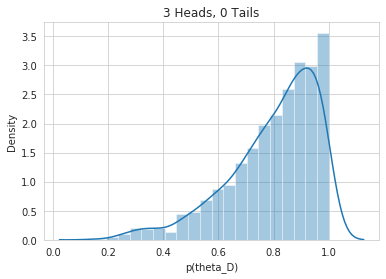

In [28]:
sns.distplot(p_theta_D)
plt.title('3 Heads, 0 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta_D)')

In [29]:
len(p_theta_D[p_theta_D<0.2])/size

0.001

Now the chance is even lower: 0.1%.

### 3 Heads, 1 Tails

In [30]:
#update step
alpha = alpha
beta = beta + 1
#draw the new distribution
p_theta_D = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta_D)')

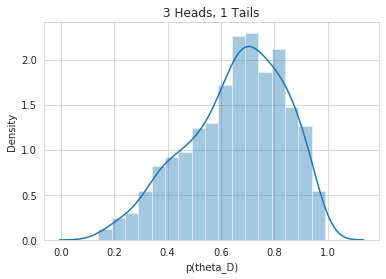

In [31]:
sns.distplot(p_theta_D)
plt.title('3 Heads, 1 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta_D)')

In [32]:
len(p_theta_D[p_theta_D<0.2])/size

0.008

The chance went back up, and we can see our distribution shifted to the left. It's now centered around p(theta)=0.75, which makes sense with the number of heads and tails.

### 3 Heads, 2 Tails

In [33]:
#update step
alpha = alpha
#unnecessary, but for example purposes I'm making it explicit
beta = beta + 1
#draw the new distribution
p_theta_D = np.random.beta(alpha,beta,size)

Text(0.5, 0, 'p(theta_D)')

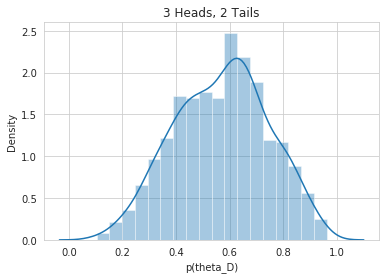

In [34]:
sns.distplot(p_theta_D)
plt.title('3 Heads, 2 Tails')
plt.ylabel('Density')
plt.xlabel('p(theta_D)')

In [35]:
len(p_theta_D[p_theta_D<0.2])/size

0.014

We're still biased toward the right, but the chance the coin's chance of heads is <0.2 is rising.

### Automating the iterations and plotting certainty

In [65]:
#initialization
alpha      = 1
beta       = 1
true_theta = 0.65
iterations = 10000
history    = []
size       = 1000
plot_its   = [2,5,10,25,100,500,1000,2000,5000,10000]

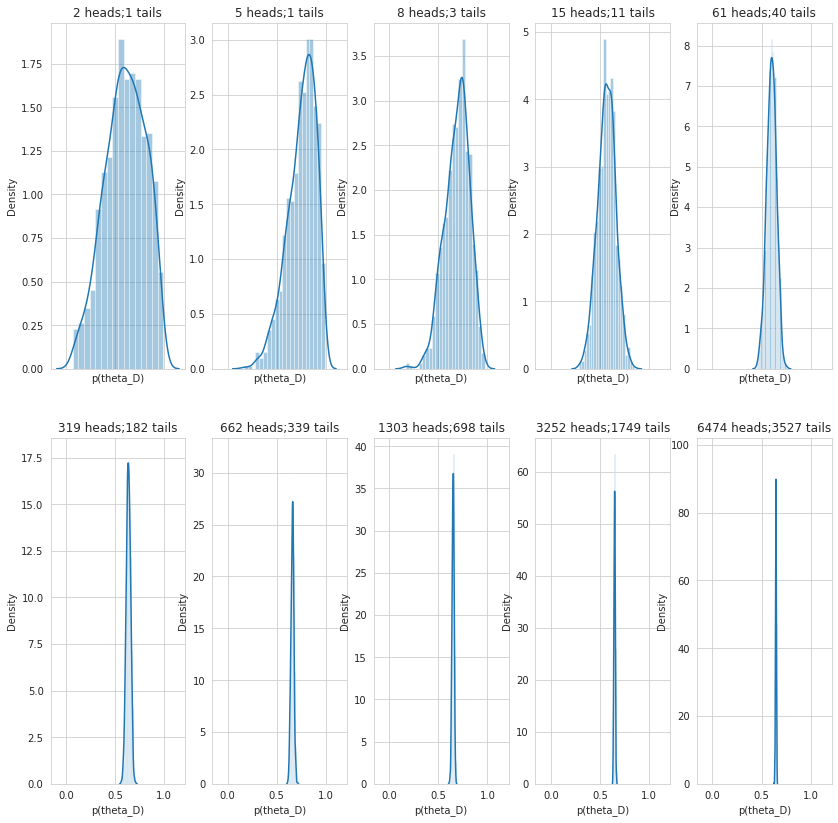

In [66]:
f, ax = plt.subplots(2, 5, figsize=(14, 14), sharex=True)
for i in range(iterations+1):
    D = np.random.binomial(1,true_theta)
    history.append(D)
    if D:
        alpha = alpha + 1
    else:
        beta = beta + 1
    if i in plot_its:
        index = plot_its.index(i)
        ax1 = np.floor(index/5).astype(int)
        ax2 = index%5
      #  ax[plot_its[plot_its==i].np.random.beta(alpha,beta,size)
        sns.distplot(np.random.beta(alpha,beta,size),ax=ax[ax1,ax2])
        ax[ax1,ax2].set_title(str(alpha-1) + ' heads;' + str(beta-1) + ' tails')
        ax[ax1,ax2].set_ylabel('Density')
        ax[ax1,ax2].set_xlabel('p(theta_D)')

As we can see, as the number of tosses increases and our prior becomes more informed, the distribution of the possible probability of the coin narrows around the true value, 0.6.

## Bayes Factor Calculation

The Bayes Factor is analogous to frequentist p-values, with a key advantage:
* p-values change with the t-statistic, which is in turn are not comparable across sample sizes. The BF describes the difference in probability of a particular outcome in two models, allowing for comparisons based upon confidence in outcomes

BF is defined as 

B(x)=(p(M1|X)/p(M2|X))⋅(p(M2)/p(M1))

where 
* M1 is the first model theta, the null hypothesis
* M2 is the second model theta, the alternative hypothesis
* X is the evidence

In plain English, we're interested in the ratio of model 1's proportion of the distribution that does NOT correspond to the estimate (in this case, 0.5 within some small bound) to model 2's proportion of the distribution corresponding to that estimate. The smaller the BF, the greater evidence we have that model 2 describes the data better than model 1. A <0.1 BF indicates strong support for model 2. 

In [309]:
# H-a: mu= 0.5
N = 20000
data_a = np.random.beta(10,10,N)
data_b = np.random.beta(10,10,N)

In [310]:
np.mean(data_b)

0.500367646069524

In [311]:
np.mean(data_a)

0.5003535271792012

In [312]:
prop_A = data_a[np.around(data_a,2)==0.5].size/data_a.size

In [313]:
prop_B = data_b[np.around(data_b,2)==0.5].size/data_b.size

In [314]:
prop_B/prop_A

1.1204268292682926

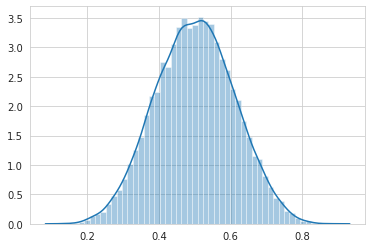

In [315]:
sns.distplot(data_a)

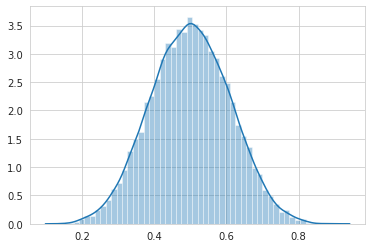

In [316]:
sns.distplot(data_b)

With the same parameters for our two models, we see a BF of 1.01, which indicates that Model A (our Bayesian model of the probability of heads based on 18 flips) does not differ from Model B (the model which indicates a fair coin in 18 flips). Since they have the same parameters, this is not surprising. Now let's look at another case.

In [317]:
# H-a: mu= 0.5
N = 20000
data_a = np.random.beta(9,4,N)
data_b = np.random.beta(6.5,6.5,N)

In [318]:
np.mean(data_b)

0.4993435635624995

In [319]:
np.mean(data_a)

0.6931166973871945

In [320]:
prop_A = data_a[np.around(data_a,2)==0.5].size/data_a.size

In [321]:
prop_B = data_b[np.around(data_b,2)==0.5].size/data_b.size

In [322]:
prop_B/prop_A

2.658767772511848

In [323]:
prop_A/prop_B

0.376114081996435

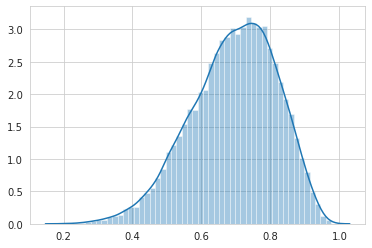

In [324]:
sns.distplot(data_a)

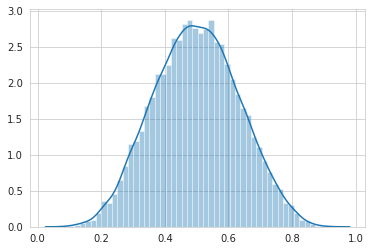

In [325]:
sns.distplot(data_b)

Here we see that Model A (our Bayesian model incorporating the data of 11 flips, 8 of which were heads) may differ from Model B (the model indicating a fair coin) with a Bayes Factor of 2.69, indicating that Model B describes the data better. However, the threshold for strong evidence in favor of Model A would be a Bayes Factor of 10; a BF between 1 and 3 indicates only minor evidence. Thus, the matter is very much still in question.

Let's now look at a question where Model A has the same ratio heads:tails, but the certainty around the estimate of theta is much improved.

In [326]:
# H-a: mu= 0.5
N = 20000
data_a = np.random.beta(18,8,N)
data_b = np.random.beta(12,12,N)

In [327]:
np.mean(data_b)

0.5001276503291779

In [328]:
np.mean(data_a)

0.6929674753292296

In [329]:
prop_A = data_a[np.around(data_a,2)==0.5].size/data_a.size

In [330]:
prop_B = data_b[np.around(data_b,2)==0.5].size/data_b.size

In [331]:
prop_B/prop_A

7.018867924528301

In [332]:
prop_A/prop_B

0.1424731182795699

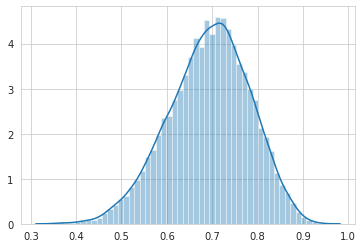

In [333]:
sns.distplot(data_a)

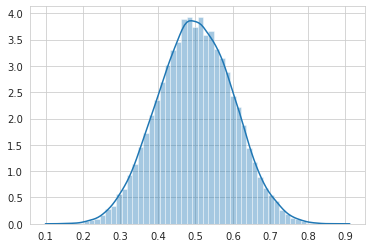

In [334]:
sns.distplot(data_b)

We can see that the Bayes Factor increases as Model B and Model A narrow their distributions. 6.7 indicates moderate evidence that Model B differs from Model A (Model A being a fair coin). However, we're still not quite at the level of strong evidence.

In [335]:
# H-a: mu= 0.5
N = 20000
data_a = np.random.beta(27,13,N)
data_b = np.random.beta(20,20,N)

In [336]:
np.mean(data_b)

0.5007337224096962

In [337]:
np.mean(data_a)

0.6742357254661436

In [338]:
prop_A = data_a[np.around(data_a,2)==0.5].size/data_a.size

In [339]:
prop_B = data_b[np.around(data_b,2)==0.5].size/data_b.size

In [340]:
prop_B/prop_A

12.602564102564102

In [341]:
prop_A/prop_B

0.07934893184130214

Only after tossing a coin 38 times do we find strong evidence that Model B is not based upon a fair coin. 

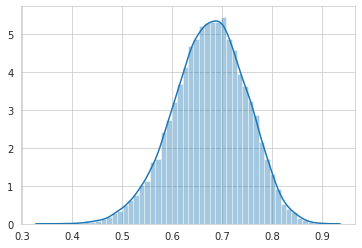

In [342]:
sns.distplot(data_a)

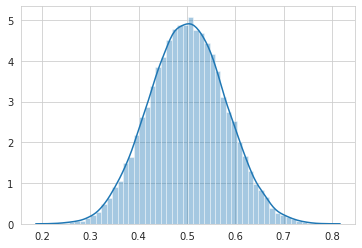

In [343]:
sns.distplot(data_b)

Looking at the plots of their distributions, we can see why: 